# Class

## 3.1

In [35]:
from utils import *
from ipywidgets import interact

In [4]:
global_economy = pd.read_csv('data/global_economy.csv')
global_economy.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [6]:
aus_economy=global_economy[global_economy['Country']=='Australia'].set_index('Year')
aus_economy.head()

,Country,Code,GDP,Growth,CPI,Imports,Exports,Population
Year,,,,,,,,
1960,Australia,AUS,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0
1961,Australia,AUS,1.964834e+10,2.485605,8.142560,15.025080,12.403101,10483000.0
1962,Australia,AUS,1.988801e+10,1.296478,8.116545,12.630927,13.943012,10742000.0
1963,Australia,AUS,2.150185e+10,6.214278,8.168574,13.834054,13.005886,10950000.0
1964,Australia,AUS,2.375854e+10,6.978724,8.402706,13.764495,14.938248,11167000.0


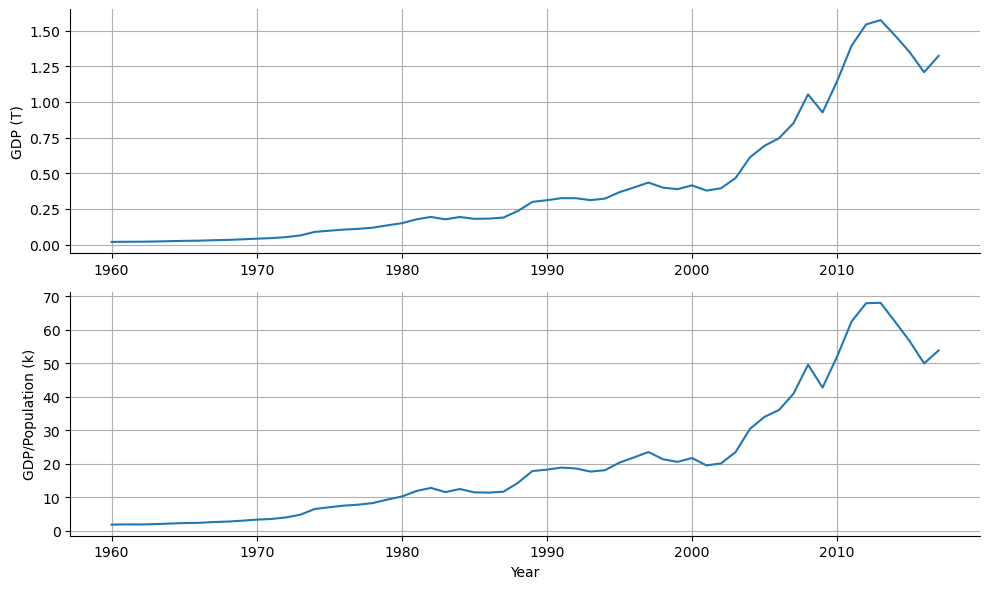

In [8]:
fig, axs = plt.subplots(2, figsize=(10, 6))

axs[0].plot(aus_economy.GDP / 1e12, label='GDP')
axs[0].set_ylabel('GDP (T)')
axs[0].grid()

axs[1].plot(aus_economy.GDP / aus_economy.Population / 1e3, label='GDP/Population')
axs[1].set_ylabel('GDP/Population (k)')
axs[1].grid()

axs[-1].set_xlabel('Year')

plt.tight_layout();

In [10]:
print_retail=pd.read_csv('data/aus_retail.csv')
print_retail['Month']=pd.to_datetime('1970-01-01') + pd.to_timedelta(print_retail['Month'].astype(int), unit='D')
print_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [17]:
print_retail['Year']=print_retail['Month'].dt.year
print_retail_turnover=print_retail[print_retail['Industry']=='Newspaper and book retailing'].groupby('Year')['Turnover'].sum()
print_retail_turnover.head()

Year
1982    1263.0
1983    1799.5
1984    2011.3
1985    2108.7
1986    2263.3
Name: Turnover, dtype: float64

In [23]:
print_retail_turnover_joined=print_retail_turnover.to_frame().join(aus_economy)
print_retail_turnover_joined['Adjusted Turnover']=print_retail_turnover_joined['Turnover']/print_retail_turnover_joined['CPI']

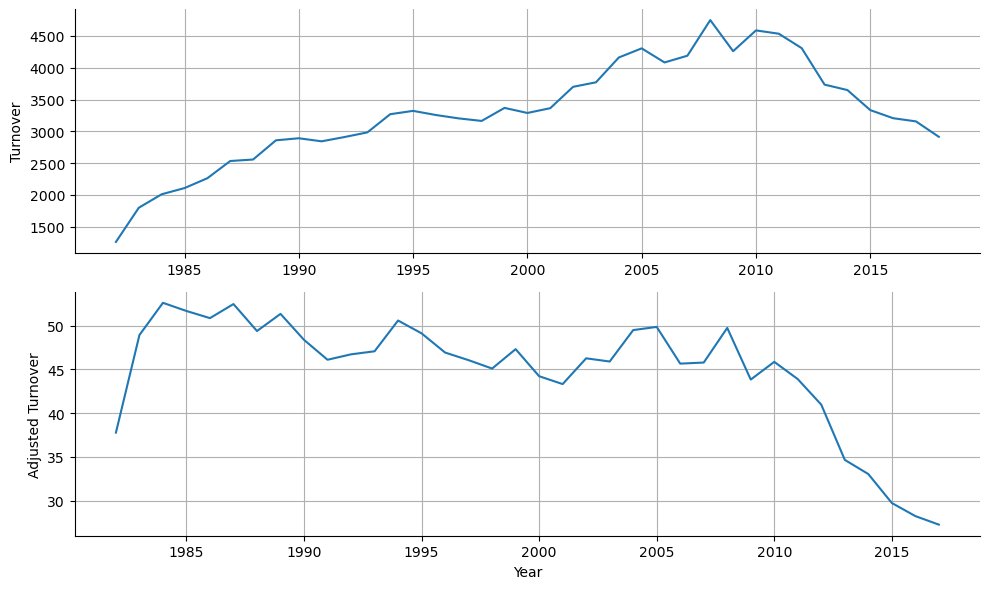

In [25]:
fig, axs = plt.subplots(2, figsize=(10, 6))

axs[0].plot(print_retail_turnover_joined['Turnover'], label='Turnover')
axs[0].set_ylabel('Turnover')
axs[0].grid()

axs[1].plot(print_retail_turnover_joined['Adjusted Turnover'], label='Adjusted Turnover')
axs[1].set_ylabel('Adjusted Turnover')
axs[1].grid()

axs[-1].set_xlabel('Year')

plt.tight_layout();

In [41]:
d = pd.read_csv('data/aus_production.csv')

d['Date']=pd.to_datetime('1970-01-01')+ pd.to_timedelta(d['Quarter'], unit='D')
d['Quarter']=d['Date'].dt.year.astype(str) + ' Q' + d['Date'].dt.quarter.astype(str)
d['Year']=d['Date'].dt.year
d.set_index('Date', inplace=True)
d.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,Year
Date,,,,,,,,
1956-01-01,1956 Q1,284,5225.0,189.0,465,3923,5,1956
1956-04-01,1956 Q2,213,5178.0,204.0,532,4436,6,1956
1956-07-01,1956 Q3,227,5297.0,208.0,561,4806,7,1956
1956-10-01,1956 Q4,308,5681.0,197.0,570,4418,6,1956
1957-01-01,1957 Q1,262,5577.0,187.0,529,4339,5,1957


In [48]:
@interact(lam=(-1, 2, .1))
def update(lam=1):
    fig, ax = plt.subplots()
    ax.plot(d.index, stats.boxcox(d.Gas, lam))
    ax.set_title(' ')
    fig.text(.01, .5, 'Transformed gas production', rotation=90,
             ha='left', va='center')
    ax.grid()
    fig.subplots_adjust(left=.1, right=.95, bottom=.1)

interactive(children=(FloatSlider(value=1.0, description='lam', max=2.0, min=-1.0), Output()), _dom_classes=('…

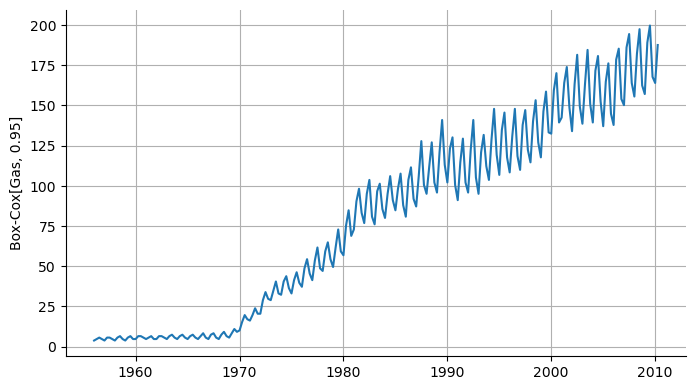

In [49]:
lam = stats.boxcox_normmax(d.Gas)
fig, ax = plt.subplots()
ax.plot(d.index, stats.boxcox(d.Gas, lam))
ax.set(ylabel=f'Box-Cox[Gas, {lam:.2f}]')
ax.grid()

## 3.2